# Let's Build & Regularize a Network with Keras 

![](https://qph.fs.quoracdn.net/main-qimg-d7f6c824d566e3f626fea25d01d39d13)

Keras, a neural network API, is now fully integrated within TensorFlow. What does that mean?
It means you have a choice between using the high-level Keras API, or the low-level TensorFlow API. High-level APIs provide more functionality within a single command and are easier to use (in comparison with low-level APIs), which makes them usable even for non-tech people. The low-level APIs allow the advanced programmer to manipulate functions within a module at a very granular level, thus allowing custom implementation for novel solutions.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [4]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train).astype(np.int32) #why 2 seperate lines of code here? 
X_test_s = ss.transform(X_test).astype(np.int32)

Remember that we’ll use our data to train our model, so we’ll want our StandardScaler object to register and proceed with the Mean and Standard Deviation of our train set and transform our test group using it. fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data. The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

The ‘stratify’ parameter comes into handy so that the proportion of values in the sample produced in our test group will be the same as the proportion of values provided to parameter stratify. This results especially useful when working around classification problems, since if we don’t provide this parameter with an array-like object, we may end with a non-representative distribution of our target classes in our test group

## Building a Network

**Sequential** - We start by instantiating a Sequential model, which represents a linear stack of layers. The Sequential constructor takes an array of Keras Layers. Since we’re just building a standard feedforward network, we only need the Dense layer, which is your regular fully-connected (dense) network layer. A dense layer simply means that each neuron receives input from all the neurons in the previous layer.

**Input data** - The number of rows in your training data is not part of the input shape of the network because the training process feeds the network one sample per batch

**Activation Function** - ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/10/17123344/act.png)

In [6]:
X_train_s.shape

(4872, 12)

In [7]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, activation='relu'))
model.add(Dense(1))

## Compile the Network

**Compiling** the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset. We must specify the **loss function** to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training. Lets define the **optimizer** as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## Fit the Keras Network

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

- Epoch: One pass through all of the rows in the training dataset.<br/>
- Batch: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs.

In [9]:
history = model.fit(X_train_s, np.array(y_train),
                    validation_data=(X_test_s, np.array(y_test)),
                   epochs=30, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 0s 66us/step - loss: 30.0453 - accuracy: 0.0010 - val_loss: 24.7199 - val_accuracy: 0.0037
Epoch 2/30
4872/4872 [==============================] - 0s 33us/step - loss: 19.6926 - accuracy: 0.0135 - val_loss: 14.8697 - val_accuracy: 0.0338
Epoch 3/30
4872/4872 [==============================] - 0s 32us/step - loss: 10.3400 - accuracy: 0.0628 - val_loss: 6.6264 - val_accuracy: 0.1255
Epoch 4/30
4872/4872 [==============================] - 0s 32us/step - loss: 4.3679 - accuracy: 0.1780 - val_loss: 3.0773 - val_accuracy: 0.2252
Epoch 5/30
4872/4872 [==============================] - 0s 30us/step - loss: 2.4536 - accuracy: 0.2726 - val_loss: 2.2137 - val_accuracy: 0.2985
Epoch 6/30
4872/4872 [==============================] - 0s 30us/step - loss: 1.8965 - accuracy: 0.3081 - val_loss: 1.7816 - val_accuracy: 0.3305
Epoch 7/30
4872/4872 [==============================] - 0s 35us/step - loss: 

In [10]:
#weights
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.3250939 , -0.09903624,  0.21558145, -0.17635845,  0.10321287,
         0.16371593,  0.1186095 , -0.03951772,  0.40096986, -0.18468809,
        -0.30288544, -0.1546325 ],
       [ 0.10970099, -0.34785253, -0.31967407,  0.10248102,  0.3172117 ,
        -0.0644388 ,  0.09793624,  0.5166459 , -0.151551  , -0.00787815,
        -0.03659868,  0.16027302],
       [ 0.34215143, -0.43448338, -0.38847688,  0.15934224,  0.50670743,
         0.26849926, -0.07667372, -0.23138116,  0.31531757,  0.41268033,
         0.4590392 ,  0.1324885 ],
       [-0.29198095,  0.02525117,  0.45621434, -0.1092868 , -0.05500028,
        -0.00535137, -0.377764  ,  0.401419  , -0.0520162 ,  0.3401823 ,
        -0.00206359, -0.20024544],
       [-0.36878604,  0.02995628,  0.14929226,  0.09180104, -0.20635061,
        -0.58113354,  0.2791452 ,  0.07463899,  0.01884113, -0.08335418,
        -0.03472344, -0.09868296],
       [-0.45587355, -0.2105173 ,  0.2524062 ,  0.28344545,  0.06389812,
         0.03911204, 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


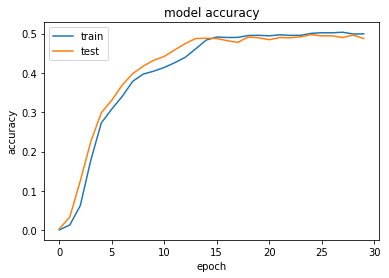

In [11]:
#plt.plot(history.history['loss'], label='Train loss')
#plt.plot(history.history['val_loss'], label='Test loss')
#plt.legend();

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#looking at the loss 
sum(abs(np.array(model.predict(X_test_s).T) - np.array(y_test))[0])

1003.4324507713318

## Adding Regularization

Networks are prone to overfitting. Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. 
**L2 & L1 regularization**

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

Cost function = Loss (say, binary cross entropy) + Regularization term

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

However, this regularization term differs in L1 and L2.

In L2, we have:
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-1.59.54-AM.png)

Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).

In L1, we have:
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-1.59.57-AM.png)


In this, we penalize the absolute value of the weights. Unlike L2, the weights may be reduced to zero here. Hence, it is very useful when we are trying to compress our model. Otherwise, we usually prefer L2 over it.

_From_ [analytics vidhya](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/#:~:text=If%20you've%20built%20a,the%20unseen%20data%20as%20well.)

In [13]:
from keras import regularizers

In [14]:
model_r = Sequential()

n_input = X_train_s.shape[1]

model_r.add(Dense(n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01))) #define regularization parameter 
model_r.add(Dense(1,
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history_r = model_r.fit(X_train_s, np.array(y_train),
                        validation_data=(X_test_s, np.array(y_test)),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 77us/step - loss: 22.4038 - accuracy: 0.0029 - val_loss: 15.8671 - val_accuracy: 0.0092
Epoch 2/42
4872/4872 [==============================] - 0s 30us/step - loss: 10.8226 - accuracy: 0.0470 - val_loss: 7.2160 - val_accuracy: 0.0892
Epoch 3/42
4872/4872 [==============================] - 0s 32us/step - loss: 5.1857 - accuracy: 0.1521 - val_loss: 4.0010 - val_accuracy: 0.1988
Epoch 4/42
4872/4872 [==============================] - 0s 31us/step - loss: 3.2474 - accuracy: 0.2254 - val_loss: 2.8051 - val_accuracy: 0.2726
Epoch 5/42
4872/4872 [==============================] - 0s 31us/step - loss: 2.3927 - accuracy: 0.2761 - val_loss: 2.1736 - val_accuracy: 0.3126
Epoch 6/42
4872/4872 [==============================] - 0s 30us/step - loss: 1.8716 - accuracy: 0.3245 - val_loss: 1.7567 - val_accuracy: 0.3557
Epoch 7/42
4872/4872 [==============================] - 0s 29us/step - loss: 1.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


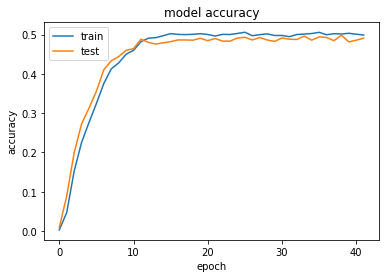

In [15]:
#plt.plot(history_r.history['loss'], label='Training loss')
#plt.plot(history_r.history['val_loss'], label='Testing loss')
#plt.legend();

print(history_r.history.keys())
plt.plot(history_r.history['accuracy'])
plt.plot(history_r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Examining Our Predictions

In [16]:
model_r.predict(X_test_s[:10]).round(2)

array([[5.84],
       [5.63],
       [5.13],
       [5.91],
       [5.21],
       [5.88],
       [5.56],
       [5.06],
       [5.68],
       [6.12]], dtype=float32)

In [17]:
y_test[:10]

930     5
143     5
1037    5
4212    5
1032    5
5236    7
4651    7
4       5
1091    6
1536    6
Name: quality, dtype: int64

In [33]:
model_r.predict(X_test_s[:10]).T

array([[5.8413997, 5.633885 , 5.134214 , 5.9062133, 5.205521 , 5.876562 ,
        5.5642138, 5.0588493, 5.681613 , 6.115461 ]], dtype=float32)

In [19]:
(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0] #WHy is this useful? 

array([0.84139967, 0.63388491, 0.13421392, ..., 1.08057499, 0.43895626,
       0.35336399])

In [20]:
sum(abs(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0])

999.1465768814087

## Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.
So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-11.52.06-PM.png)

So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.


In [21]:
from keras.layers import Dropout

In [22]:
model_d = Sequential()

n_input = X_train_s.shape[1]

model_d.add(Dense(n_input, activation='relu'))
model_d.add(Dropout(0.2)) #probability of how many nodes to be dropped
model_d.add(Dense(1))

model_d.compile(optimizer='adam', loss='mean_squared_error')

history_d = model_d.fit(X_train_s, np.array(y_train),
                        validation_data=(X_test_s, np.array(y_test)),
                        epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 79us/step - loss: 26.3137 - val_loss: 19.5252
Epoch 2/42
4872/4872 [==============================] - 0s 39us/step - loss: 14.6648 - val_loss: 9.4620
Epoch 3/42
4872/4872 [==============================] - 0s 38us/step - loss: 7.5349 - val_loss: 4.4343
Epoch 4/42
4872/4872 [==============================] - 0s 37us/step - loss: 4.9840 - val_loss: 2.9384
Epoch 5/42
4872/4872 [==============================] - 0s 39us/step - loss: 4.0793 - val_loss: 2.3203
Epoch 6/42
4872/4872 [==============================] - 0s 38us/step - loss: 3.4174 - val_loss: 1.9075
Epoch 7/42
4872/4872 [==============================] - 0s 38us/step - loss: 3.0547 - val_loss: 1.6255
Epoch 8/42
4872/4872 [==============================] - 0s 39us/step - loss: 2.7288 - val_loss: 1.4019
Epoch 9/42
4872/4872 [==============================] - 0s 36us/step - loss: 2.5672 - val_loss: 1.1882
Epoch 10/42
4872/4872 

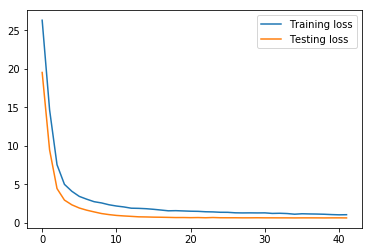

In [23]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [24]:
sum(abs(np.array(model_d.predict(X_test_s).T) - np.array(y_test))[0])

1003.4087238311768

## Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.
Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-12.31.56-AM.png)

We stop training at the dotted line becasue thats when the network begins to overfit on the training data 


In [25]:
from keras.callbacks import EarlyStopping

In [26]:
model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(1))

model_es.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, np.array(y_train),
                          validation_data=(X_test_s, np.array(y_test)),
                         epochs=40, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/40
4872/4872 [==============================] - 0s 60us/step - loss: 29.1735 - val_loss: 23.3297
Epoch 2/40
4872/4872 [==============================] - 0s 29us/step - loss: 17.5355 - val_loss: 12.3353
Epoch 3/40
4872/4872 [==============================] - 0s 29us/step - loss: 8.7477 - val_loss: 6.0772
Epoch 4/40
4872/4872 [==============================] - 0s 29us/step - loss: 4.6631 - val_loss: 3.5338
Epoch 5/40
4872/4872 [==============================] - 0s 28us/step - loss: 3.0097 - val_loss: 2.4531
Epoch 6/40
4872/4872 [==============================] - 0s 28us/step - loss: 2.1909 - val_loss: 1.8826
Epoch 7/40
4872/4872 [==============================] - 0s 28us/step - loss: 1.7200 - val_loss: 1.5406
Epoch 8/40
4872/4872 [==============================] - 0s 29us/step - loss: 1.4236 - val_loss: 1.3120
Epoch 9/40
4872/4872 [==============================] - 0s 29us/step - loss: 1.2118 - val_loss: 1.1392
Epoch 10/40
4872/4872

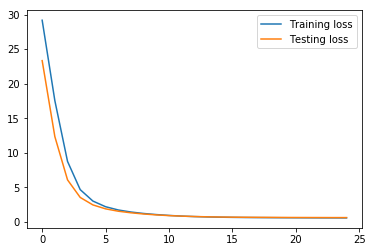

In [27]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();

In [28]:
sum(abs(np.array(model_es.predict(X_test_s).T) - np.array(y_test))[0])

996.3541021347046

## Exercise

Build your own network *with some sort of regularization built in* to predict digits using sklearn's `load_digits` dataset!

The imports you need are in the next cell.

Here are a couple hints and leading questions:

1. You'll need to use `to_categorical()` on your target. (What does this function do?)
2. What should your output layer look like? How many neurons should it have and what should your activation function be there?
3. When we compile this network, what loss function should we use?
4. When we compile this network, we can add a list of metrics, such as `['acc']`.

In [29]:
from sklearn.datasets import load_digits
from keras.utils import to_categorical

In [30]:
data = load_digits()
print(data.data)
print(data.target)
print(data.DESCR)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

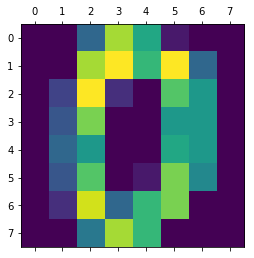

In [31]:
plt.matshow(data.images[0]);